In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
# Load Lena image from local folder
print("Loading Lena image...")
img = cv2.imread('lena.png', cv2.IMREAD_COLOR)

print("\n" + "="*80)
print("ALIASING DEMONSTRATION")
print("="*80)
print("Demonstrating image degradation due to downsampling (aliasing effect)")
print("="*80)

Loading Lena image...

ALIASING DEMONSTRATION
Demonstrating image degradation due to downsampling (aliasing effect)


In [3]:
# ============================================================================
# METHOD 1: USING BUILT-IN FUNCTIONS (OpenCV)
# ============================================================================
print("\n" + "="*80)
print("METHOD 1: USING BUILT-IN FUNCTIONS (OpenCV)")
print("="*80)

# Convert to grayscale using built-in
f = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(f"f (original grayscale): {f.shape}")

# Resize to 512x512 - this is f1
f1_builtin = cv2.resize(f, (512, 512))
print(f"f1 (512x512): {f1_builtin.shape}")

# Downsample f1 by factor 4 to get f2 (128x128)
f2_builtin = cv2.resize(f1_builtin, (128, 128))
print(f"f2 (downsampled by 4): {f2_builtin.shape}")

# Downsample f2 by factor 4 to get f3 (32x32)
f3_builtin = cv2.resize(f2_builtin, (32, 32))
print(f"f3 (downsampled by 4): {f3_builtin.shape}")

# Downsample f3 by factor 4 to get f4 (8x8)
f4_builtin = cv2.resize(f3_builtin, (8, 8))
print(f"f4 (downsampled by 4): {f4_builtin.shape}")

# Upsample all images back to 512x512 for display purposes
f1_display_builtin = f1_builtin
f2_display_builtin = cv2.resize(f2_builtin, (512, 512), interpolation=cv2.INTER_NEAREST)
f3_display_builtin = cv2.resize(f3_builtin, (512, 512), interpolation=cv2.INTER_NEAREST)
f4_display_builtin = cv2.resize(f4_builtin, (512, 512), interpolation=cv2.INTER_NEAREST)

print(f"\nAll images upscaled to 512x512 for display")


METHOD 1: USING BUILT-IN FUNCTIONS (OpenCV)
f (original grayscale): (512, 512)
f1 (512x512): (512, 512)
f2 (downsampled by 4): (128, 128)
f3 (downsampled by 4): (32, 32)
f4 (downsampled by 4): (8, 8)

All images upscaled to 512x512 for display


In [4]:
# ============================================================================
# METHOD 2: MANUAL IMPLEMENTATION (Without Built-in Functions)
# ============================================================================
print("\n" + "="*80)
print("METHOD 2: MANUAL IMPLEMENTATION (Without Built-in Functions)")
print("="*80)

# Convert to grayscale manually
rows, cols, channels = img.shape
f_manual = np.zeros((rows, cols), dtype=np.uint8)
for i in range(rows):
    for j in range(cols):
        b, g, r = img[i, j]
        f_manual[i, j] = int(0.299 * r + 0.587 * g + 0.114 * b)

print(f"f (original grayscale): {f_manual.shape}")

# Manual resize to 512x512 (f1)
def manual_resize(src_img, target_rows, target_cols):
    """Manual image resizing using nearest neighbor interpolation"""
    src_rows, src_cols = src_img.shape
    dst_img = np.zeros((target_rows, target_cols), dtype=np.uint8)
    
    row_ratio = src_rows / target_rows
    col_ratio = src_cols / target_cols
    
    for i in range(target_rows):
        for j in range(target_cols):
            src_i = int(i * row_ratio)
            src_j = int(j * col_ratio)
            # Ensure indices are within bounds
            src_i = min(src_i, src_rows - 1)
            src_j = min(src_j, src_cols - 1)
            dst_img[i, j] = src_img[src_i, src_j]
    
    return dst_img

f1_manual = manual_resize(f_manual, 512, 512)
print(f"f1 (512x512): {f1_manual.shape}")

# Downsample f1 by factor 4 to get f2 (128x128)
f2_manual = manual_resize(f1_manual, 128, 128)
print(f"f2 (downsampled by 4): {f2_manual.shape}")

# Downsample f2 by factor 4 to get f3 (32x32)
f3_manual = manual_resize(f2_manual, 32, 32)
print(f"f3 (downsampled by 4): {f3_manual.shape}")

# Downsample f3 by factor 4 to get f4 (8x8)
f4_manual = manual_resize(f3_manual, 8, 8)
print(f"f4 (downsampled by 4): {f4_manual.shape}")

# Upsample all images back to 512x512 for display purposes
f1_display_manual = f1_manual
f2_display_manual = manual_resize(f2_manual, 512, 512)
f3_display_manual = manual_resize(f3_manual, 512, 512)
f4_display_manual = manual_resize(f4_manual, 512, 512)

print(f"\nAll images upscaled to 512x512 for display")


METHOD 2: MANUAL IMPLEMENTATION (Without Built-in Functions)
f (original grayscale): (512, 512)
f1 (512x512): (512, 512)
f2 (downsampled by 4): (128, 128)
f3 (downsampled by 4): (32, 32)
f4 (downsampled by 4): (8, 8)

All images upscaled to 512x512 for display



CREATING VISUALIZATIONS
Built-in method visualization saved as 'aliasing_builtin.png'


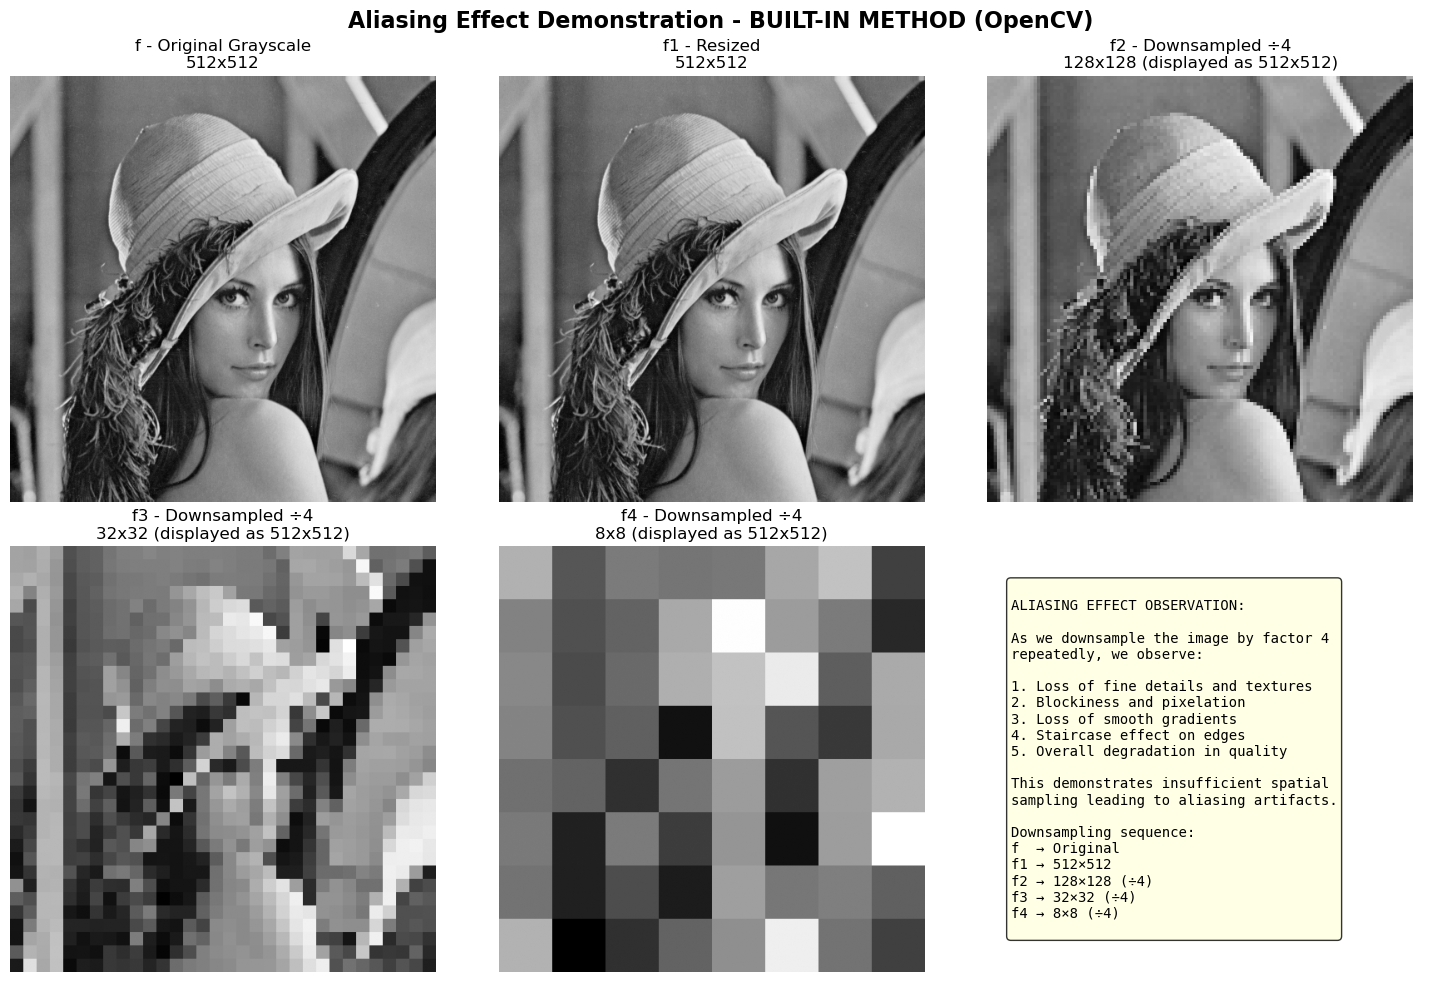

Manual method visualization saved as 'aliasing_manual.png'


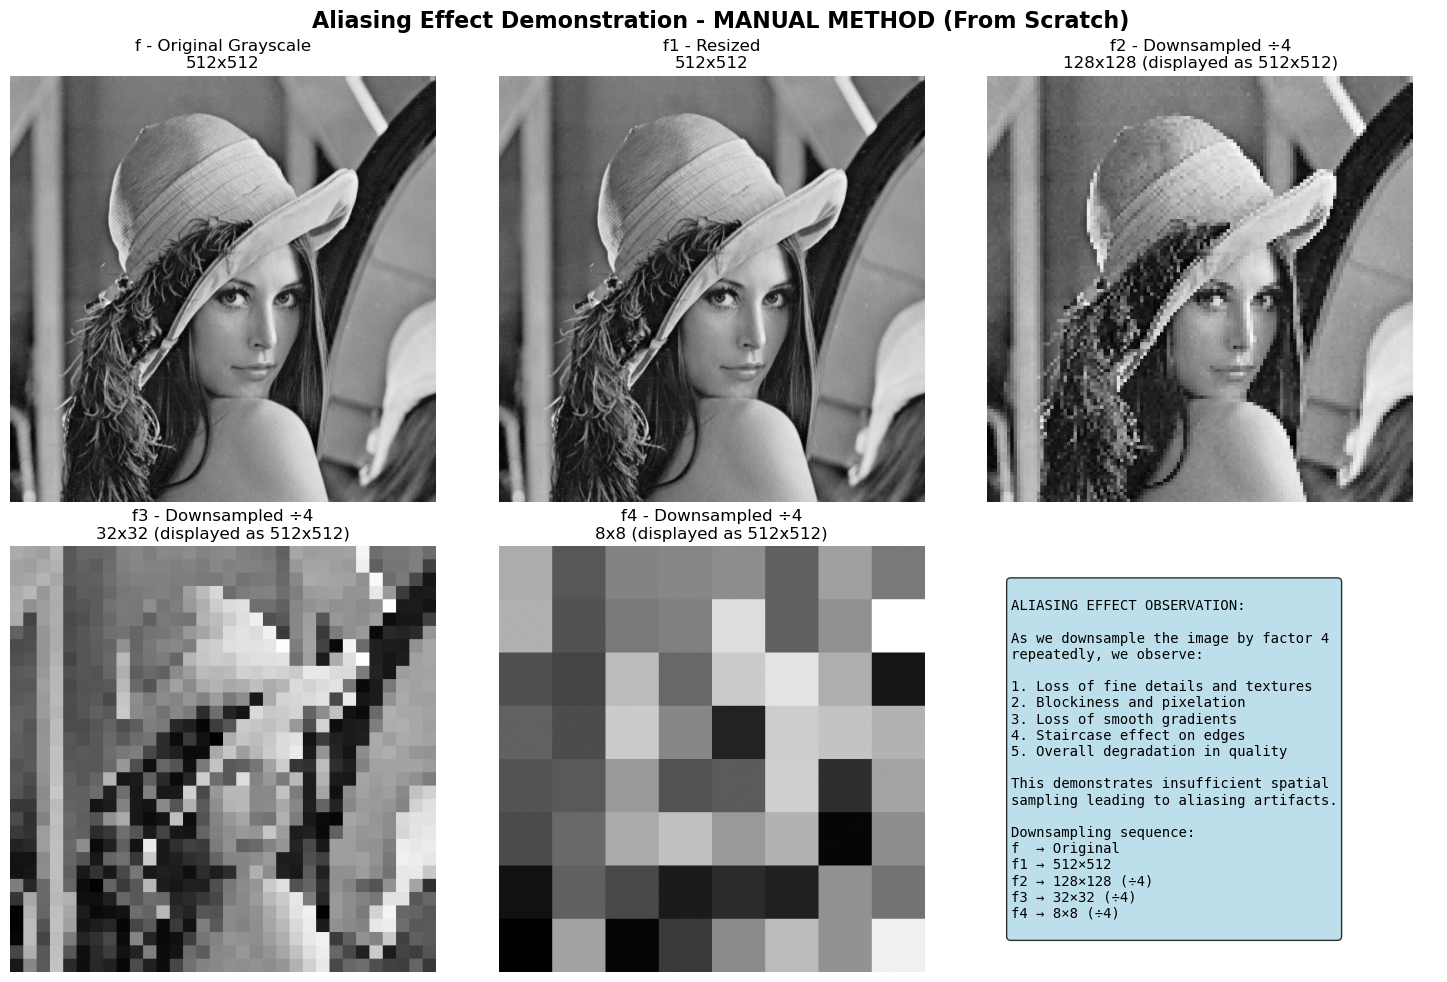

Comparison visualization saved as 'aliasing_comparison.png'


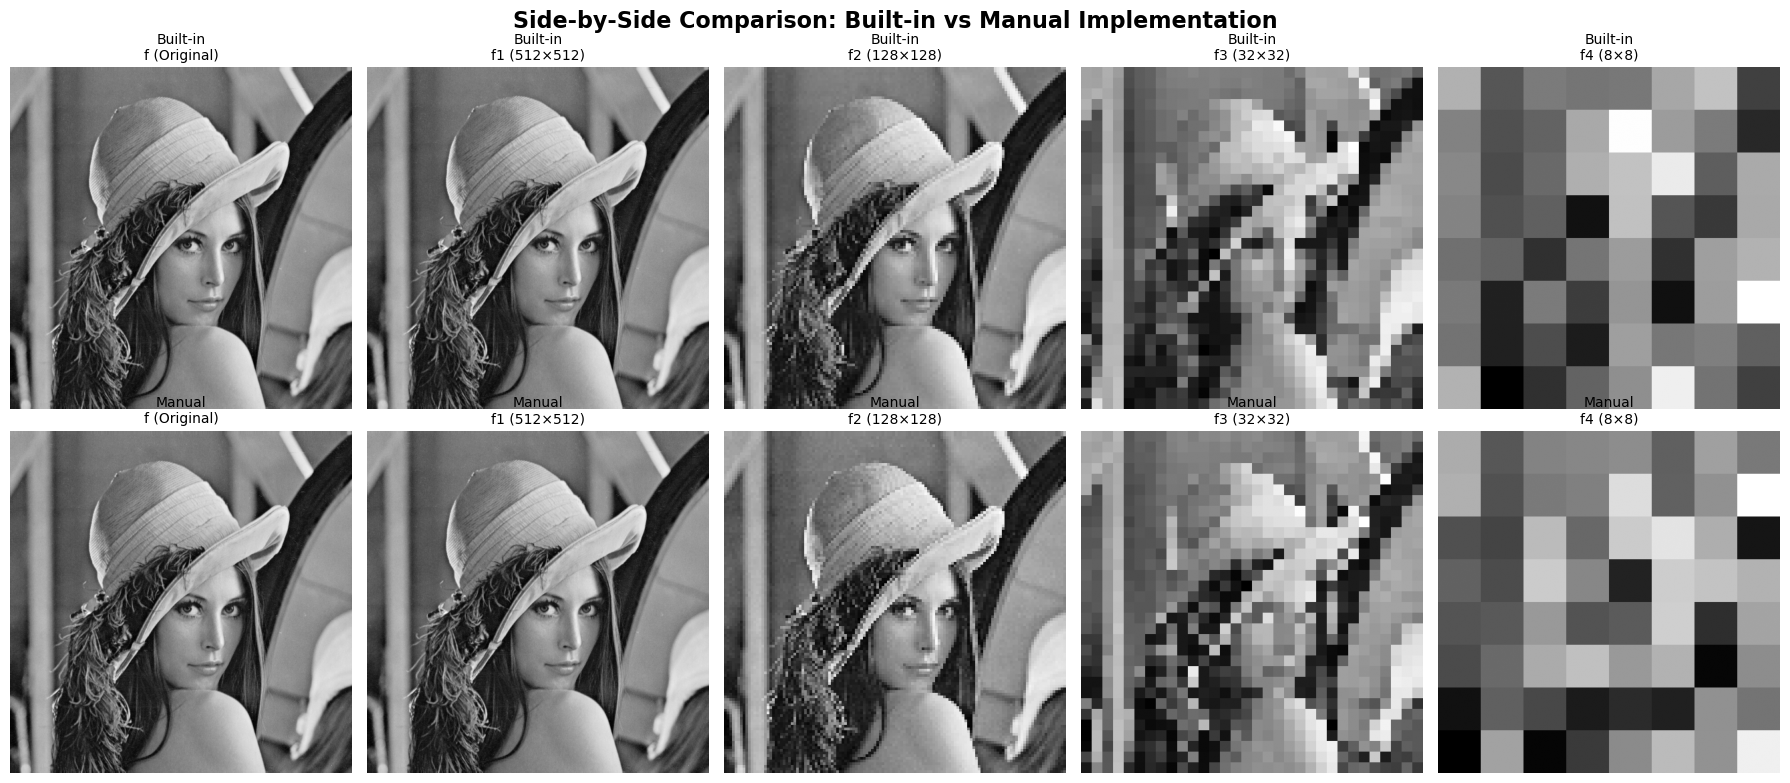


SUMMARY

Downsampling Sequence:
  f  : (512, 512) (Original grayscale)
  f1 : 512×512
  f2 : 128×128 (downsampled by factor 4)
  f3 : 32×32 (downsampled by factor 4)
  f4 : 8×8 (downsampled by factor 4)

Total reduction factor: 512/8 = 64×
Number of pixels reduced from: 262144 to 64 = 4096.0× reduction

Aliasing Artifacts Observed:
  ✓ Progressive loss of detail with each downsampling
  ✓ Blockiness and pixelation become prominent
  ✓ Smooth edges become jagged (staircase effect)
  ✓ Fine textures are completely lost
  ✓ Image becomes unrecognizable at 8×8 resolution

Analysis complete!


In [5]:

# ============================================================================
# VISUALIZATION
# ============================================================================
print("\n" + "="*80)
print("CREATING VISUALIZATIONS")
print("="*80)

# Create figure with built-in method results
fig1, axes1 = plt.subplots(2, 3, figsize=(15, 10))
fig1.suptitle('Aliasing Effect Demonstration - BUILT-IN METHOD (OpenCV)', 
              fontsize=16, fontweight='bold')

# Display original grayscale
axes1[0, 0].imshow(f, cmap='gray')
axes1[0, 0].set_title(f'f - Original Grayscale\n{f.shape[0]}x{f.shape[1]}', fontsize=12)
axes1[0, 0].axis('off')

# Display f1
axes1[0, 1].imshow(f1_display_builtin, cmap='gray')
axes1[0, 1].set_title(f'f1 - Resized\n512x512', fontsize=12)
axes1[0, 1].axis('off')

# Display f2
axes1[0, 2].imshow(f2_display_builtin, cmap='gray')
axes1[0, 2].set_title(f'f2 - Downsampled ÷4\n128x128 (displayed as 512x512)', fontsize=12)
axes1[0, 2].axis('off')

# Display f3
axes1[1, 0].imshow(f3_display_builtin, cmap='gray')
axes1[1, 0].set_title(f'f3 - Downsampled ÷4\n32x32 (displayed as 512x512)', fontsize=12)
axes1[1, 0].axis('off')

# Display f4
axes1[1, 1].imshow(f4_display_builtin, cmap='gray')
axes1[1, 1].set_title(f'f4 - Downsampled ÷4\n8x8 (displayed as 512x512)', fontsize=12)
axes1[1, 1].axis('off')

# Add explanation text
explanation_text = """
ALIASING EFFECT OBSERVATION:

As we downsample the image by factor 4 
repeatedly, we observe:

1. Loss of fine details and textures
2. Blockiness and pixelation
3. Loss of smooth gradients
4. Staircase effect on edges
5. Overall degradation in quality

This demonstrates insufficient spatial
sampling leading to aliasing artifacts.

Downsampling sequence:
f  → Original
f1 → 512×512
f2 → 128×128 (÷4)
f3 → 32×32 (÷4)
f4 → 8×8 (÷4)
"""
axes1[1, 2].text(0.1, 0.5, explanation_text, fontsize=10,
                verticalalignment='center', family='monospace',
                bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8))
axes1[1, 2].axis('off')

plt.tight_layout()
plt.savefig('aliasing_builtin.png', dpi=150, bbox_inches='tight')
print("Built-in method visualization saved as 'aliasing_builtin.png'")
plt.show()

# Create figure with manual method results
fig2, axes2 = plt.subplots(2, 3, figsize=(15, 10))
fig2.suptitle('Aliasing Effect Demonstration - MANUAL METHOD (From Scratch)', 
              fontsize=16, fontweight='bold')

# Display original grayscale
axes2[0, 0].imshow(f_manual, cmap='gray')
axes2[0, 0].set_title(f'f - Original Grayscale\n{f_manual.shape[0]}x{f_manual.shape[1]}', fontsize=12)
axes2[0, 0].axis('off')

# Display f1
axes2[0, 1].imshow(f1_display_manual, cmap='gray')
axes2[0, 1].set_title(f'f1 - Resized\n512x512', fontsize=12)
axes2[0, 1].axis('off')

# Display f2
axes2[0, 2].imshow(f2_display_manual, cmap='gray')
axes2[0, 2].set_title(f'f2 - Downsampled ÷4\n128x128 (displayed as 512x512)', fontsize=12)
axes2[0, 2].axis('off')

# Display f3
axes2[1, 0].imshow(f3_display_manual, cmap='gray')
axes2[1, 0].set_title(f'f3 - Downsampled ÷4\n32x32 (displayed as 512x512)', fontsize=12)
axes2[1, 0].axis('off')

# Display f4
axes2[1, 1].imshow(f4_display_manual, cmap='gray')
axes2[1, 1].set_title(f'f4 - Downsampled ÷4\n8x8 (displayed as 512x512)', fontsize=12)
axes2[1, 1].axis('off')

# Add explanation text
axes2[1, 2].text(0.1, 0.5, explanation_text, fontsize=10,
                verticalalignment='center', family='monospace',
                bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))
axes2[1, 2].axis('off')

plt.tight_layout()
plt.savefig('aliasing_manual.png', dpi=150, bbox_inches='tight')
print("Manual method visualization saved as 'aliasing_manual.png'")
plt.show()

# Create comparison figure
fig3, axes3 = plt.subplots(2, 5, figsize=(18, 8))
fig3.suptitle('Side-by-Side Comparison: Built-in vs Manual Implementation', 
              fontsize=16, fontweight='bold')

images_builtin = [f, f1_display_builtin, f2_display_builtin, f3_display_builtin, f4_display_builtin]
images_manual = [f_manual, f1_display_manual, f2_display_manual, f3_display_manual, f4_display_manual]
titles = ['f (Original)', 'f1 (512×512)', 'f2 (128×128)', 'f3 (32×32)', 'f4 (8×8)']

for i in range(5):
    # Built-in
    axes3[0, i].imshow(images_builtin[i], cmap='gray')
    axes3[0, i].set_title(f'Built-in\n{titles[i]}', fontsize=10)
    axes3[0, i].axis('off')
    
    # Manual
    axes3[1, i].imshow(images_manual[i], cmap='gray')
    axes3[1, i].set_title(f'Manual\n{titles[i]}', fontsize=10)
    axes3[1, i].axis('off')

plt.tight_layout()
plt.savefig('aliasing_comparison.png', dpi=150, bbox_inches='tight')
print("Comparison visualization saved as 'aliasing_comparison.png'")
plt.show()

# Print summary
print("\n" + "="*80)
print("SUMMARY")
print("="*80)
print("\nDownsampling Sequence:")
print(f"  f  : {f.shape} (Original grayscale)")
print(f"  f1 : 512×512")
print(f"  f2 : 128×128 (downsampled by factor 4)")
print(f"  f3 : 32×32 (downsampled by factor 4)")
print(f"  f4 : 8×8 (downsampled by factor 4)")
print(f"\nTotal reduction factor: 512/8 = 64×")
print(f"Number of pixels reduced from: {512*512} to {8*8} = {(512*512)/(8*8):.1f}× reduction")
print("\nAliasing Artifacts Observed:")
print("  ✓ Progressive loss of detail with each downsampling")
print("  ✓ Blockiness and pixelation become prominent")
print("  ✓ Smooth edges become jagged (staircase effect)")
print("  ✓ Fine textures are completely lost")
print("  ✓ Image becomes unrecognizable at 8×8 resolution")
print("\n" + "="*80)
print("Analysis complete!")
print("="*80)